# 3. Feature Engineering:

In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import re
import time

In [131]:
df = pd.read_csv('cleaned_properties.csv')


In [132]:
df

,Title,Location,Price,Size,Size_unit,Listing_Type
0,1 Bedroom Apartment For Rent,"Ruwi, Muscat",150,70.0,Sq. M.,For Rent
1,1 Bedroom Apartment For Rent,"Al Hail, Muscat",300,100.0,Sq. M.,For Rent
2,3 Bedrooms Villa For Rent,"Qurum, Muscat",750,300.0,Sq. M.,For Rent
3,4 Bedrooms Villa For Rent,"Madinat As Sultan Qaboos, Muscat",950,300.0,Sq. M.,For Rent
4,2 Bedrooms Apartment For Rent in,"Al Hamriyah, Muscat",250,100.0,Sq. M.,For Rent
...,...,...,...,...,...,...
6100,3-BEDROOM TOWNHOUSE [WA-155],Al Mouj,"1,100 OMR",1.0,Sq. M.,For Rent
6101,Exquisite 3-Bedroom Luxury Villa in the Heart ...,Al Mouj,"1,250 OMR",270.0,Sq. M.,For Rent
6102,Luxury furnished apartment for rent - primer L...,Azaiba,500 OMR,145.0,Sq. M.,For Rent
6103,100 m2 2 Bedrooms Apartments for Rent in Musca...,Al Maabilah,160 OMR,100.0,Sq. M.,For Rent


In [133]:
df['Currency'] = df['Price'].str.extract(r'([A-Za-z]+)')

df['Price'] = df['Price'].str.replace(r'[^\d.]', '', regex=True)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

In [134]:

cols = df.columns.tolist()

cols.remove('Currency')

cols.insert(cols.index('Price') + 1, 'Currency')

df = df[cols]

df['Currency'] = df['Currency'].fillna('OMR')

In [135]:
df

,Title,Location,Price,Currency,Size,Size_unit,Listing_Type
0,1 Bedroom Apartment For Rent,"Ruwi, Muscat",150.0,OMR,70.0,Sq. M.,For Rent
1,1 Bedroom Apartment For Rent,"Al Hail, Muscat",300.0,OMR,100.0,Sq. M.,For Rent
2,3 Bedrooms Villa For Rent,"Qurum, Muscat",750.0,OMR,300.0,Sq. M.,For Rent
3,4 Bedrooms Villa For Rent,"Madinat As Sultan Qaboos, Muscat",950.0,OMR,300.0,Sq. M.,For Rent
4,2 Bedrooms Apartment For Rent in,"Al Hamriyah, Muscat",250.0,OMR,100.0,Sq. M.,For Rent
...,...,...,...,...,...,...,...
6100,3-BEDROOM TOWNHOUSE [WA-155],Al Mouj,1100.0,OMR,1.0,Sq. M.,For Rent
6101,Exquisite 3-Bedroom Luxury Villa in the Heart ...,Al Mouj,1250.0,OMR,270.0,Sq. M.,For Rent
6102,Luxury furnished apartment for rent - primer L...,Azaiba,500.0,OMR,145.0,Sq. M.,For Rent
6103,100 m2 2 Bedrooms Apartments for Rent in Musca...,Al Maabilah,160.0,OMR,100.0,Sq. M.,For Rent


In [142]:
print(df.isnull().sum())

Title            0
Location         0
Price            0
Currency         0
Size             0
Size_unit        0
Listing_Type     0
Price_per_SqM    0
dtype: int64


In [141]:
df = df.dropna(subset=['Price'])

In [143]:
df['Price_per_SqM'] = df['Price'] / df['Size']

In [144]:
df

,Title,Location,Price,Currency,Size,Size_unit,Listing_Type,Price_per_SqM
0,1 Bedroom Apartment For Rent,"Ruwi, Muscat",150.0,OMR,70.0,Sq. M.,For Rent,2.142857
1,1 Bedroom Apartment For Rent,"Al Hail, Muscat",300.0,OMR,100.0,Sq. M.,For Rent,3.000000
2,3 Bedrooms Villa For Rent,"Qurum, Muscat",750.0,OMR,300.0,Sq. M.,For Rent,2.500000
3,4 Bedrooms Villa For Rent,"Madinat As Sultan Qaboos, Muscat",950.0,OMR,300.0,Sq. M.,For Rent,3.166667
4,2 Bedrooms Apartment For Rent in,"Al Hamriyah, Muscat",250.0,OMR,100.0,Sq. M.,For Rent,2.500000
...,...,...,...,...,...,...,...,...
6100,3-BEDROOM TOWNHOUSE [WA-155],Al Mouj,1100.0,OMR,1.0,Sq. M.,For Rent,1100.000000
6101,Exquisite 3-Bedroom Luxury Villa in the Heart ...,Al Mouj,1250.0,OMR,270.0,Sq. M.,For Rent,4.629630
6102,Luxury furnished apartment for rent - primer L...,Azaiba,500.0,OMR,145.0,Sq. M.,For Rent,3.448276
6103,100 m2 2 Bedrooms Apartments for Rent in Musca...,Al Maabilah,160.0,OMR,100.0,Sq. M.,For Rent,1.600000


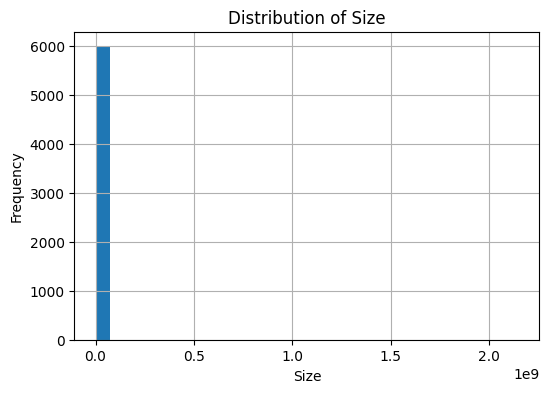

In [145]:
plt.figure(figsize=(6, 4))
df['Size'].hist(bins=30)
plt.title('Distribution of Size')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.show()

In [146]:
print( df[df['Size'] <= 10000])

                                                  Title  \
0                          1 Bedroom Apartment For Rent   
1                          1 Bedroom Apartment For Rent   
2                             3 Bedrooms Villa For Rent   
3                             4 Bedrooms Villa For Rent   
4                      2 Bedrooms Apartment For Rent in   
...                                                 ...   
6100                       3-BEDROOM TOWNHOUSE [WA-155]   
6101  Exquisite 3-Bedroom Luxury Villa in the Heart ...   
6102  Luxury furnished apartment for rent - primer L...   
6103  100 m2 2 Bedrooms Apartments for Rent in Musca...   
6104                  2BHK Apartment for rent - Bousher   

                              Location   Price Currency   Size Size_unit  \
0                         Ruwi, Muscat   150.0      OMR   70.0    Sq. M.   
1                      Al Hail, Muscat   300.0      OMR  100.0    Sq. M.   
2                        Qurum, Muscat   750.0      OMR  300.0 

In [147]:
print(df['Size'].skew())


38.63177970907045


In [148]:
print(df['Size'].sort_values(ascending=False).head(10))



5834    2.147484e+09
5129    2.147484e+09
4148    2.147484e+09
5860    2.147484e+09
3442    1.011111e+08
2352    1.000000e+08
5544    1.111111e+07
4019    1.000000e+07
3569    5.055555e+06
2810    5.000000e+06
Name: Size, dtype: float64


In [149]:

df = df[df['Size'] <= 10000]


In [150]:
print(df['Size'].sort_values(ascending=False).head(10))



4272    10000.0
3817    10000.0
5412    10000.0
3806    10000.0
5217    10000.0
2278     8646.0
5664     8000.0
1870     7000.0
4592     6009.0
1651     5607.0
Name: Size, dtype: float64


<Axes: >

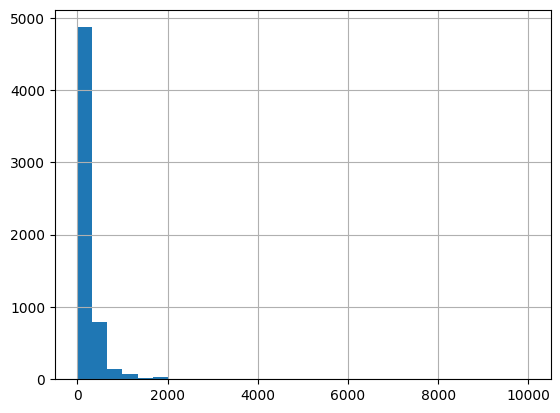

In [151]:
df['Size'].hist(bins=30)


In [152]:
print(df['Size'].skew())


11.331423081541962


Lambda for Size: 0.18599748106197497
Skewness after Box-Cox: 0.17312176285859113


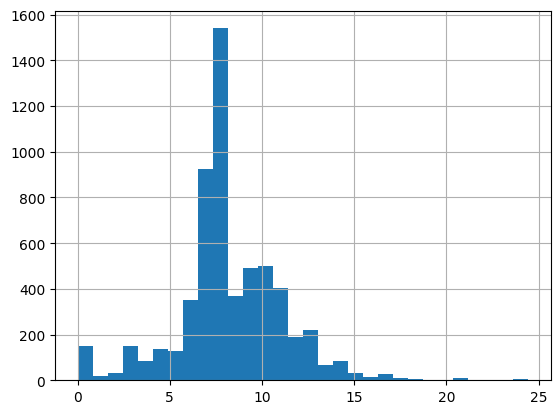

In [153]:
from scipy.stats import boxcox


df = df[df['Size'] > 0]


df['Size_boxcox'], lambda_size = boxcox(df['Size'])


print("Lambda for Size:", lambda_size)


df['Size_boxcox'].hist(bins=30)
print("Skewness after Box-Cox:", df['Size_boxcox'].skew())


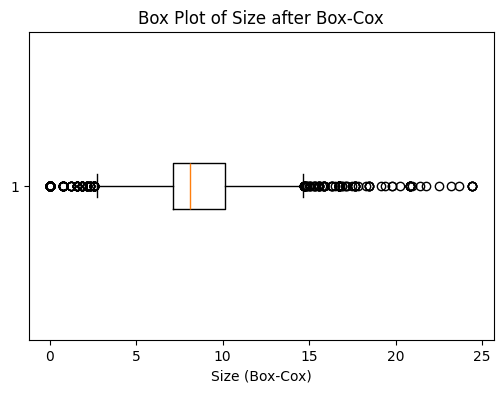

In [154]:
plt.figure(figsize=(6, 4))
plt.boxplot(df['Size_boxcox'].dropna(), vert=False)
plt.title('Box Plot of Size after Box-Cox')
plt.xlabel('Size (Box-Cox)')
plt.show()


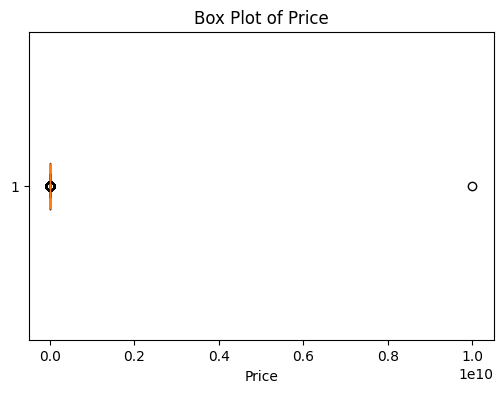

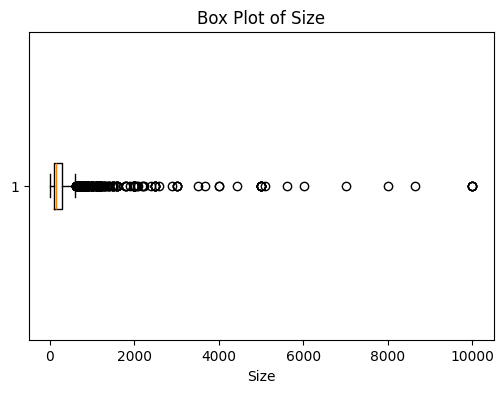

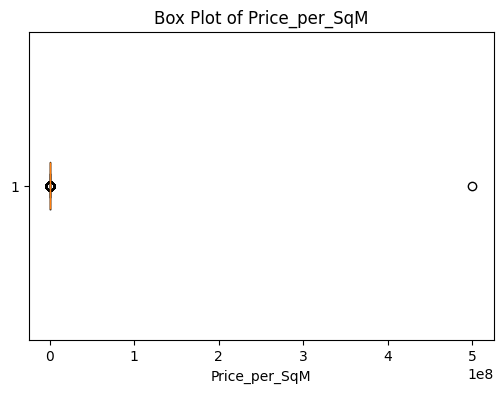

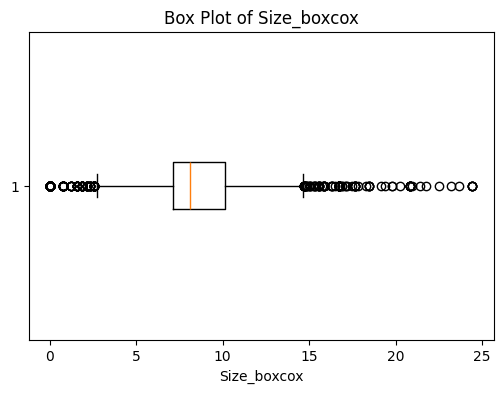

In [155]:
numeric_cols = df.select_dtypes(include=['number']).columns


for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    plt.boxplot(df[col].dropna(), vert=False)
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()

In [156]:
print(df['Price'].sort_values(ascending=False).head(10))  

df = df[df['Price'] <= 1000000]  


2279    1.000000e+10
5810    5.000500e+06
1255    1.000000e+06
6070    1.000000e+06
2377    3.700000e+05
1505    3.500550e+05
2195    3.500000e+05
2399    1.700000e+05
5625    1.500000e+05
4057    1.000000e+05
Name: Price, dtype: float64


<Axes: >

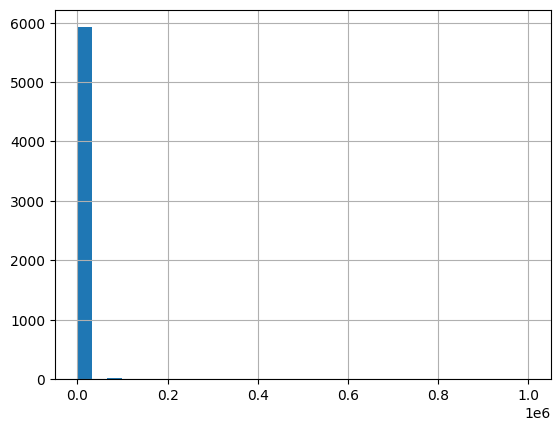

In [157]:
df['Price'].hist(bins=30)


In [158]:
print(df['Price'].skew())


40.428079587463834


Skewness after Log: 0.10476140347938545


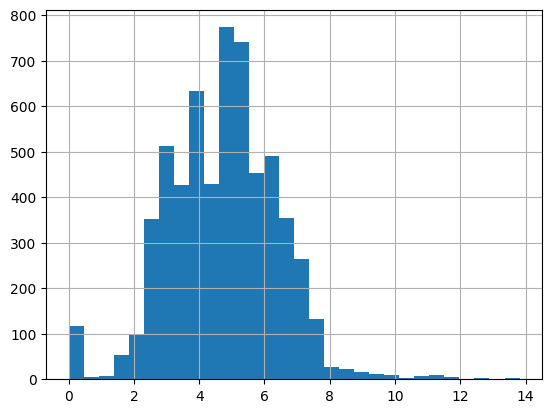

In [159]:


df = df[df['Price'] > 0]  
df['Price_log'] = np.log(df['Price'])

df['Price_log'].hist(bins=30)

print("Skewness after Log:", df['Price_log'].skew())



In [160]:
df


,Title,Location,Price,Currency,Size,Size_unit,Listing_Type,Price_per_SqM,Size_boxcox,Price_log
0,1 Bedroom Apartment For Rent,"Ruwi, Muscat",150.0,OMR,70.0,Sq. M.,For Rent,2.142857,6.472442,5.010635
1,1 Bedroom Apartment For Rent,"Al Hail, Muscat",300.0,OMR,100.0,Sq. M.,For Rent,3.000000,7.285163,5.703782
2,3 Bedrooms Villa For Rent,"Qurum, Muscat",750.0,OMR,300.0,Sq. M.,For Rent,2.500000,10.155721,6.620073
3,4 Bedrooms Villa For Rent,"Madinat As Sultan Qaboos, Muscat",950.0,OMR,300.0,Sq. M.,For Rent,3.166667,10.155721,6.856462
4,2 Bedrooms Apartment For Rent in,"Al Hamriyah, Muscat",250.0,OMR,100.0,Sq. M.,For Rent,2.500000,7.285163,5.521461
...,...,...,...,...,...,...,...,...,...,...
6100,3-BEDROOM TOWNHOUSE [WA-155],Al Mouj,1100.0,OMR,1.0,Sq. M.,For Rent,1100.000000,0.000000,7.003065
6101,Exquisite 3-Bedroom Luxury Villa in the Heart ...,Al Mouj,1250.0,OMR,270.0,Sq. M.,For Rent,4.629630,9.854304,7.130899
6102,Luxury furnished apartment for rent - primer L...,Azaiba,500.0,OMR,145.0,Sq. M.,For Rent,3.448276,8.191149,6.214608
6103,100 m2 2 Bedrooms Apartments for Rent in Musca...,Al Maabilah,160.0,OMR,100.0,Sq. M.,For Rent,1.600000,7.285163,5.075174


In [112]:
print(df.columns)


Index(['Title', 'Location', 'Price', 'Currency', 'Size', 'Size_unit',
       'Listing_Type', 'Price_per_SqM', 'Size_boxcox', 'Price_log'],
      dtype='object')


In [188]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred_log = model.predict(X_test)

y_pred = np.exp(y_pred_log)
mae = mean_absolute_error(y_test_real, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_real, y_pred))
r2 = r2_score(y_test_real, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.2f}")


MAE: 303.92
RMSE: 4674.22
R2: 0.86


In [186]:
df

,Title,Location,Price,Currency,Size,Size_unit,Listing_Type,Price_per_SqM,Size_boxcox,Price_log
0,1 Bedroom Apartment For Rent,"Ruwi, Muscat",150.0,OMR,70.0,Sq. M.,For Rent,2.142857,6.472442,5.010635
1,1 Bedroom Apartment For Rent,"Al Hail, Muscat",300.0,OMR,100.0,Sq. M.,For Rent,3.000000,7.285163,5.703782
2,3 Bedrooms Villa For Rent,"Qurum, Muscat",750.0,OMR,300.0,Sq. M.,For Rent,2.500000,10.155721,6.620073
3,4 Bedrooms Villa For Rent,"Madinat As Sultan Qaboos, Muscat",950.0,OMR,300.0,Sq. M.,For Rent,3.166667,10.155721,6.856462
4,2 Bedrooms Apartment For Rent in,"Al Hamriyah, Muscat",250.0,OMR,100.0,Sq. M.,For Rent,2.500000,7.285163,5.521461
...,...,...,...,...,...,...,...,...,...,...
6100,3-BEDROOM TOWNHOUSE [WA-155],Al Mouj,1100.0,OMR,1.0,Sq. M.,For Rent,1100.000000,0.000000,7.003065
6101,Exquisite 3-Bedroom Luxury Villa in the Heart ...,Al Mouj,1250.0,OMR,270.0,Sq. M.,For Rent,4.629630,9.854304,7.130899
6102,Luxury furnished apartment for rent - primer L...,Azaiba,500.0,OMR,145.0,Sq. M.,For Rent,3.448276,8.191149,6.214608
6103,100 m2 2 Bedrooms Apartments for Rent in Musca...,Al Maabilah,160.0,OMR,100.0,Sq. M.,For Rent,1.600000,7.285163,5.075174
